#### Deep Learning : AI2100

#### HW5

#### Tanmay Goyal- AI20BTECH11021

In [380]:
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, Dataset
import torchvision.transforms as transforms
import torchvision
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.manifold import TSNE
import warnings
warnings.filterwarnings(action='ignore',)           # to get rid of TSNE warnings

### ASSIGNMENT 4 RESULTS

Cells have been copied with minor adjustments to code.

##### Vanilla SGD with batch size = 50 , 100

Accuracy is 0.0


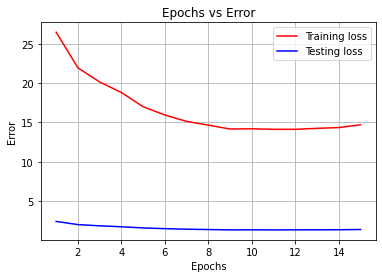

In [ ]:
# VANILLA SGD FOR BATCH SIZE 50
# defining constants and random weight initialisation
np.random.seed(213)

epochs = 15
batch_size = 40
n_input = 64
n_hidden = 49
n_output = 10

kernels_l1 = []
for i in range(4):
    kernels_l1.append(np.random.random((5,5)))
kernels_l1 = np.stack(np.array(kernels_l1),axis = 2)
# print(kernels_l1.shape)

kernels_l2 = []
for i in range(4):
    kernels_l2.append(np.random.random((5,5,4)))
kernels_l2 = np.stack(np.array(kernels_l2),axis = 2)

w_input_hidden =   np.random.random((n_hidden , n_input + 1))
w_hidden_output =   np.random.random((n_output , n_hidden + 1))


# VANILLA SGD FOR BATCH SIZE 50
train(training_data , 15 , 50 , "vanilla", kernels_l1 , kernels_l2 , w_input_hidden , w_hidden_output)

Accuracy is 0.15


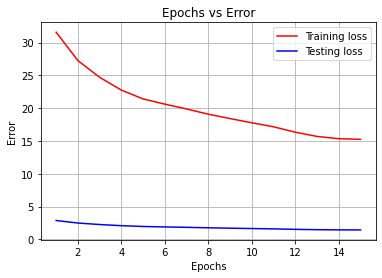

In [ ]:
# VANILLA SGD FOR BATCH SIZE 100
# defining constants and random weight initialisation
np.random.seed(213)

epochs = 15
batch_size = 40
n_input = 64
n_hidden = 49
n_output = 10

kernels_l1 = []
for i in range(4):
    kernels_l1.append(np.random.random((5,5)))
kernels_l1 = np.stack(np.array(kernels_l1),axis = 2)
# print(kernels_l1.shape)

kernels_l2 = []
for i in range(4):
    kernels_l2.append(np.random.random((5,5,4)))
kernels_l2 = np.stack(np.array(kernels_l2),axis = 2)

w_input_hidden =  np.random.random((n_hidden , n_input + 1))
w_hidden_output =  np.random.random((n_output , n_hidden + 1))


# VANILLA SGD FOR BATCH SIZE 100
train(training_data , 15 , 100 , "vanilla", kernels_l1 , kernels_l2 , w_input_hidden , w_hidden_output)

##### Momentum

Accuracy is 0.0


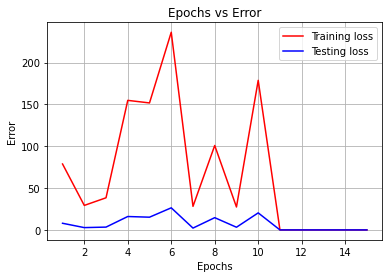

In [ ]:
# MOMENTUM FOR BATCH SIZE 50
# defining constants and random weight initialisation
np.random.seed(213)

epochs = 15
batch_size = 40
n_input = 64
n_hidden = 49
n_output = 10

kernels_l1 = []
for i in range(4):
    kernels_l1.append(np.random.random((5,5)))
kernels_l1 = np.stack(np.array(kernels_l1),axis = 2)
# print(kernels_l1.shape)

kernels_l2 = []
for i in range(4):
    kernels_l2.append(np.random.random((5,5,4)))
kernels_l2 = np.stack(np.array(kernels_l2),axis = 2)

w_input_hidden =  np.random.random((n_hidden , n_input + 1))
w_hidden_output =  np.random.random((n_output , n_hidden + 1))


# MOMENTUM FOR BATCH SIZE 50
train(training_data , 15 , 50 , "momentum", kernels_l1 , kernels_l2 , w_input_hidden , w_hidden_output)

Accuracy is 0.0


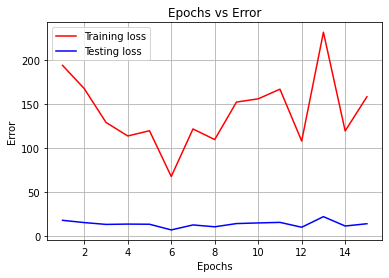

In [ ]:
# RMSPROP FOR BATCH SIZE 50
# defining constants and random weight initialisation
np.random.seed(213)

epochs = 15
batch_size = 40
n_input = 64
n_hidden = 49
n_output = 10

kernels_l1 = []
for i in range(4):
    kernels_l1.append(np.random.random((5,5)))
kernels_l1 = np.stack(np.array(kernels_l1),axis = 2)
# print(kernels_l1.shape)

kernels_l2 = []
for i in range(4):
    kernels_l2.append(np.random.random((5,5,4)))
kernels_l2 = np.stack(np.array(kernels_l2),axis = 2)
w_input_hidden =  np.random.random((n_hidden , n_input + 1))
w_hidden_output =  np.random.random((n_output , n_hidden + 1))


# RMSPROP FOR BATCH SIZE 50
train(training_data , 15 , 50 , "rmsprop", kernels_l1 , kernels_l2 , w_input_hidden , w_hidden_output)

### USING PYTORCH

In [381]:
# pre-defining constants
epochs = 15
n_input = 64
n_hidden = 49
n_output = 10
batch_size = 50

In [382]:
# reference: https://pytorch.org/tutorials/beginner/blitz/neural_networks_tutorial.html
# reference: https://www.youtube.com/watch?v=wnK3uWv_WkU
# reference: https://machinelearningknowledge.ai/pytorch-conv2d-explained-with-examples/
# reference: https://towardsdatascience.com/build-a-fashion-mnist-cnn-pytorch-style-efb297e22582


class Net(nn.Module):                   # a class that inherits from nn.Module

        def __init__(self , dropout_rate = 0.5):             
            # any object gets initialised according to this
            
            super(Net,self).__init__()  # inherits all properties of super class without mentioning explicitely
                                        # Net refers to the subclass, self refers to the object, same as super()
            
            # by default, pytorch would take a kernel of size 5x5xin_channels, and perform convolution 4 times
            # 3Dconv performs 4D convolution, so we use 2Dconv as our input to layer is 3D
            # source: https://stackoverflow.com/questions/70841365/kernel-size-for-3d-convolution 
            # size is [batch_size , 1 , 28 , 28]

            # first convolution layer
            self.conv1 = nn.Conv2d(in_channels = 1 , out_channels = 4 ,kernel_size = (5,5) , stride = (1,1))
            
            # first pooling layer
            self.pool1 = nn.MaxPool2d(kernel_size = (2,2) , stride = (2,2))

            # second convolution layer
            self.conv2 = nn.Conv2d(in_channels = 4 , out_channels = 4 , kernel_size = (5,5) , stride = (1,1))
             
            # second pooling layer
            self.pool2 = nn.MaxPool2d(kernel_size = (2,2) , stride = (2,2))

            # input layer to fully connected neural network
            self.fc1 = nn.Linear(in_features = n_input, out_features = n_hidden , bias = True )

            # hidden layer of the fully connected neural network
            self.fc2 = nn.Linear(in_features = n_hidden , out_features = n_output , bias = True)

            # dropout layer
            self.dropout = nn.Dropout(dropout_rate)

            # batch normalization
            self.batch_norm = nn.BatchNorm1d(n_hidden)
            

            
        def forward(self , x , dropout = False , batch_norm = False):
            x = F.relu(self.conv1(x))               # applying ReLu to convolved output
            x = self.pool1(x)                       # max Pooling
            x = F.relu(self.conv2(x))               # applying ReLu to convolved output
            x = self.pool2(x)                       # max Pooling
            x = x.reshape((batch_size , 64))        # since the flattening matrix is I, we dont need to do anything
            bottleneck = x.detach().numpy()         # keeping track of bottleneck to plot for tSNE
            x = self.fc1(x)                         # passing through input layer of MLP
            if batch_norm == True:
                x = self.batch_norm(x)              # applying batch norm before passing through activation function
            x = F.relu(x)                           # applying ReLu
            if dropout == True:
                x = self.dropout(x)                 # applying dropout
            x = self.fc2(x)                         # passing through hidden layer of MLP
            return x, bottleneck                                # softmax not required since loss = cross-entropy

 

In [383]:
# loading the datasets

transformation = transforms.Compose([transforms.Resize((28)) , transforms.ToTensor()])
train_data = torchvision.datasets.MNIST(root = './data', train = True, download = True , transform =transformation)
test_data = torchvision.datasets.MNIST(root = './data', train = False, download = True , transform =transformation)

train_loader = DataLoader(dataset = train_data , batch_size = 2000 )
test_loader  =  DataLoader(dataset = test_data, batch_size = 2000 )

In [384]:
# preparing our training and testing data
# batch size 2000 because we need only 1000 images to train on, not full dataset

training_data = []
testing_data = []

examples = iter(train_loader)
example_data_train, example_targets_train = examples.next()
example_targets_train = example_targets_train.numpy()

examples = iter(test_loader)
example_data_test, example_targets_test = examples.next()
example_targets_test = example_targets_test.numpy()

lengths_train = [0 for i in range(10)]      # to check if the number of images for each class is 100
lengths_test = [0 for i in range(10)]      # to check if the number of images for each class is 10


# appending tuples of data vector and true labels 
for counter in range(2000):
    inp = example_data_train[counter][0].numpy() 
    target = example_targets_train[counter]
    if lengths_train[target] <= 99:         # to ensure we donot go beyond the specified limit of images per class
        training_data.append((inp.reshape(28,28,1),target))
        lengths_train[target] += 1

    if np.sum(np.array(lengths_train)) == 1000:
        break
    
for counter in range(2000):
    inp = example_data_test[counter][0].numpy() 
    target = example_targets_test[counter]
    if lengths_test[target] <= 9:           # to ensure we donot go beyond the specified limit of images per class
        testing_data.append((inp.reshape(28,28,1), target))
        lengths_test[target] += 1

    if np.sum(np.array(lengths_test)) == 100:
        break


##### Vanilla SGD for batch_size = 50 and 100

The accuracy is: 0.1


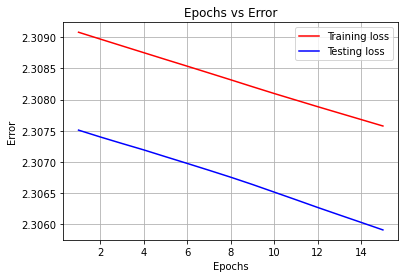

Bottleneck layer in the first epoch


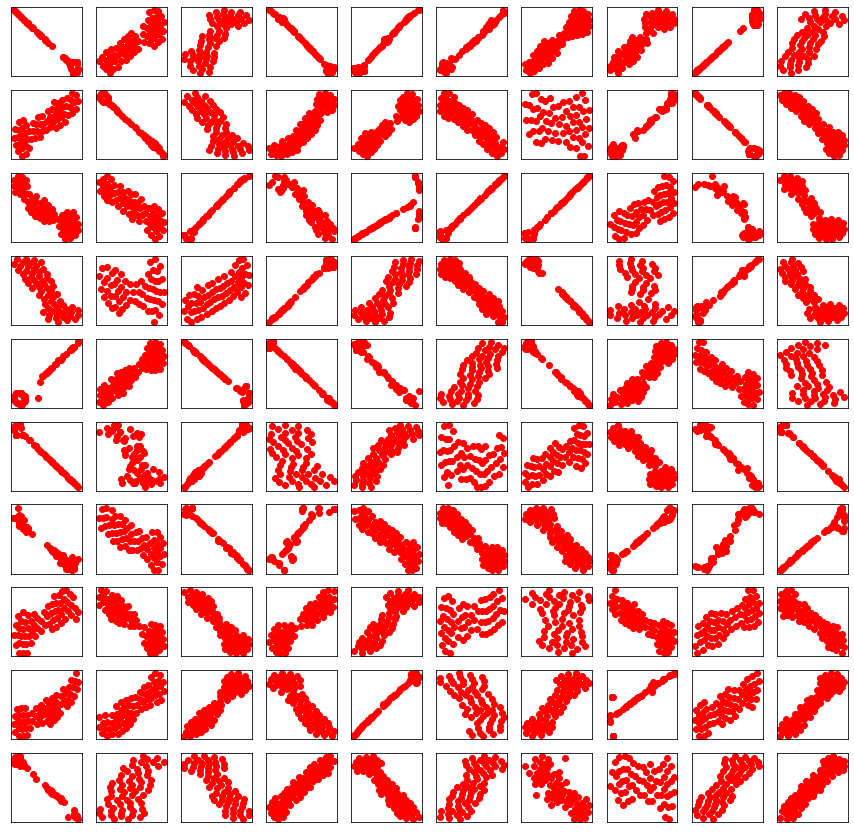

Bottleneck layer in last epoch


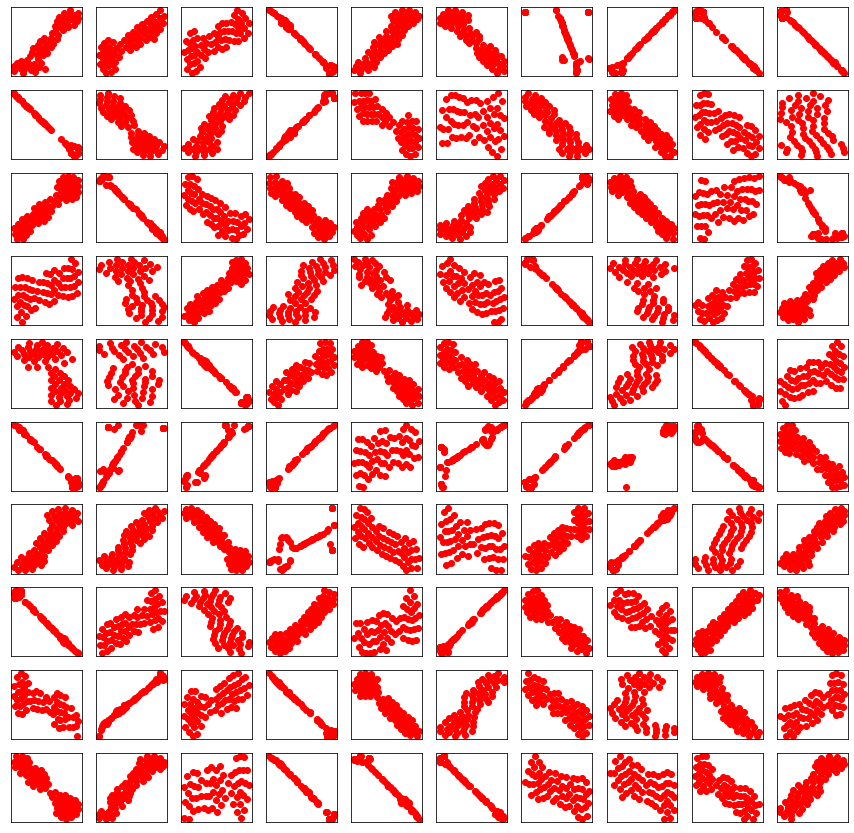

In [385]:
# initialising object of class Net
net = Net()

# setting up optimizer
optimizer = torch.optim.SGD(params = net.parameters() ,lr = 0.001)


train_loss = []
test_loss = []
vanilla_50_first_epoch = []
vanilla_50_last_epoch = []

for e in range(epochs):
    batch_size = 50
    # number of batches per epoch
    counter = 1000 // batch_size

    # shuffling training data
    np.random.shuffle(training_data)

    for c in range(counter):
        
        # compiling batch_size number of images and labels
        x = torch.tensor(np.array([training_data[i][0] for i in range(c * batch_size , (c+1) * batch_size)])).reshape(batch_size , 1 , 28 , 28)
        y = torch.tensor(np.array([training_data[i][1] for i in range(c * batch_size , (c+1) * batch_size)]))

        # computing output
        out , _= net(x)

        # computing loss
        loss = F.cross_entropy(out , y)
        
        # setting gradients to zero, calculating gradients and updating parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    batch_size = 1000
    # computing training loss over entire training set
    train_x = torch.tensor(np.array([training_data[i][0] for i in range(len(training_data))])).reshape(len(training_data) , 1 , 28 , 28)
    train_y = torch.tensor(np.array([training_data[i][1] for i in range(len(training_data))]))
    output_train , _ = net(train_x)
    loss = F.cross_entropy(output_train , train_y)
    train_loss.append(loss.item())

    batch_size = 100
    # computing testing loss over entire testing set
    test_x = torch.tensor(np.array([testing_data[i][0] for i in range(len(testing_data))])).reshape(len(testing_data) , 1 , 28 , 28)
    test_y = torch.tensor(np.array([testing_data[i][1] for i in range(len(testing_data))]))
    output_test , bottleneck = net(test_x)
    test_loss.append(F.cross_entropy(output_test , test_y).item())
    
    # if first or last epoch, append the bottleneck layers
    if e == 0:
        vanilla_50_first_epoch.append(bottleneck)
    if e == epochs - 1:
        vanilla_50_last_epoch.append(bottleneck)
    
    # calculating accuracy
    if (e == epochs - 1):
        accuracy = 0
        for i in range(len(testing_data)):
            pred = np.where(output_test[i , :] == output_test[i , :].max())[0][0]
            if pred == test_y[i]:
                accuracy += 1
        accuracy /= len(testing_data)


print("The accuracy is: {}".format(accuracy))

# plotting errors vs epoch
x = [i for i in range(1,16)]
plt.plot(x , train_loss , 'r-' , label = "Training loss")
plt.plot(x , test_loss , 'b-' , label = "Testing loss")
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.legend()
plt.grid(True)
plt.title("Epochs vs Error")
plt.show()

# plotting bottleneck layers for first epoch
print("Bottleneck layer in the first epoch")
plt.figure(figsize = (15,15))
for i in range(100):
    plt.subplot(10,10,i+1)
    bn_layer = vanilla_50_first_epoch[0][i , :].reshape(-1,1)
    bn_layer_vis = TSNE(n_components = 2).fit_transform(bn_layer)
    plt.plot(bn_layer_vis[:,0] , bn_layer_vis[:,1], 'ro')
    plt.xticks([])
    plt.yticks([])

plt.show()

# plotting bottleneck layers for last epoch
print("Bottleneck layer in last epoch")
plt.figure(figsize = (15,15))
for i in range(100):
    plt.subplot(10,10,i+1)
    bn_layer = vanilla_50_last_epoch[0][i , :].reshape(-1,1)
    bn_layer_vis = TSNE(n_components = 2).fit_transform(bn_layer)
    plt.plot(bn_layer_vis[:,0] , bn_layer_vis[:,1], 'ro')
    plt.xticks([])
    plt.yticks([])
plt.show()
        

The accuracy is: 0.1


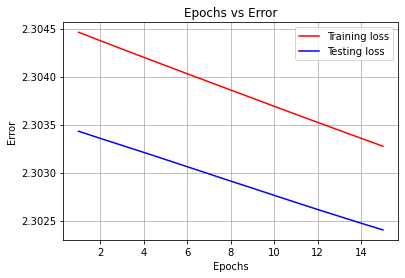

Bottleneck layer in the first epoch


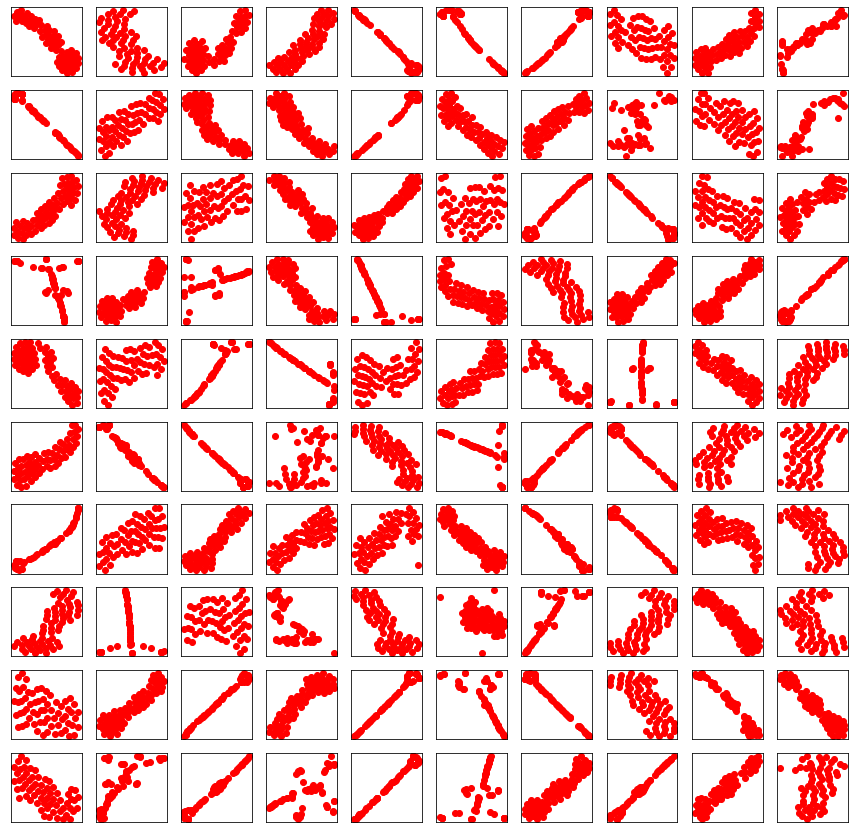

Bottleneck layer in last epoch


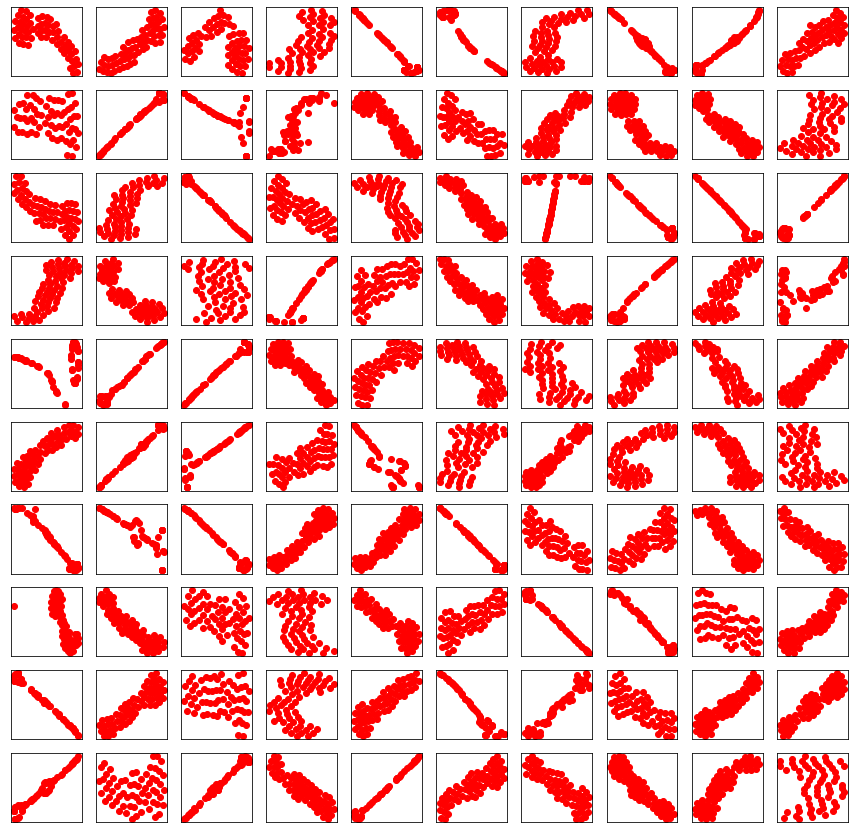

In [387]:
# initialising object of class Net
net = Net()

# setting up optimizer
optimizer = torch.optim.SGD(params = net.parameters() ,lr = 0.001)


train_loss = []
test_loss = []
vanilla_100_first_epoch = []
vanilla_100_last_epoch = []

for e in range(epochs):
    batch_size = 100
    # number of batches per epoch
    counter = 1000 // batch_size

    # shuffling training data
    np.random.shuffle(training_data)

    for c in range(counter):
        
        # compiling batch_size number of images and labels
        x = torch.tensor(np.array([training_data[i][0] for i in range(c * batch_size , (c+1) * batch_size)])).reshape(batch_size , 1 , 28 , 28)
        y = torch.tensor(np.array([training_data[i][1] for i in range(c * batch_size , (c+1) * batch_size)]))

        # computing output
        out , _ = net(x)
            
        # computing loss
        loss = F.cross_entropy(out , y)
        
        # setting gradients to zero, calculating gradients and updating parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    batch_size = 1000
    # computing training loss over entire training set
    train_x = torch.tensor(np.array([training_data[i][0] for i in range(len(training_data))])).reshape(len(training_data) , 1 , 28 , 28)
    train_y = torch.tensor(np.array([training_data[i][1] for i in range(len(training_data))]))
    output_train , _ = net(train_x)
    loss = F.cross_entropy(output_train , train_y)
    train_loss.append(loss.item())

    batch_size = 100
    # computing testing loss over entire testing set
    test_x = torch.tensor(np.array([testing_data[i][0] for i in range(len(testing_data))])).reshape(len(testing_data) , 1 , 28 , 28)
    test_y = torch.tensor(np.array([testing_data[i][1] for i in range(len(testing_data))]))
    output_test ,bottleneck = net(test_x)
    test_loss.append(F.cross_entropy(output_test , test_y).item())\
    
    # if first or last epoch, append the bottleneck layers
    if e == 0:
        vanilla_100_first_epoch.append(bottleneck)
    if e == epochs - 1:
        vanilla_100_last_epoch.append(bottleneck)

    # calculating accuracy
    if (e == epochs - 1):
        accuracy = 0
        for i in range(len(testing_data)):
            pred = np.where(output_test[i , :] == output_test[i , :].max())[0][0]
            if pred == test_y[i]:
                accuracy += 1
        accuracy /= len(testing_data)


print("The accuracy is: {}".format(accuracy))

# plotting errors vs epoch
x = [i for i in range(1,16)]
plt.plot(x , train_loss , 'r-' , label = "Training loss")
plt.plot(x , test_loss , 'b-' , label = "Testing loss")
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.legend()
plt.grid(True)
plt.title("Epochs vs Error")
plt.show()

# plotting bottleneck layers for first epoch
print("Bottleneck layer in the first epoch")
plt.figure(figsize = (15,15))
for i in range(100):
    plt.subplot(10,10,i+1)
    bn_layer = vanilla_100_first_epoch[0][i , :].reshape(-1,1)
    bn_layer_vis = TSNE(n_components = 2).fit_transform(bn_layer)
    plt.plot(bn_layer_vis[:,0] , bn_layer_vis[:,1], 'ro')
    plt.xticks([])
    plt.yticks([])

plt.show()

# plotting bottleneck layers for last epoch
print("Bottleneck layer in last epoch")
plt.figure(figsize = (15,15))
for i in range(100):
    plt.subplot(10,10,i+1)
    bn_layer = vanilla_100_last_epoch[0][i , :].reshape(-1,1)
    bn_layer_vis = TSNE(n_components = 2).fit_transform(bn_layer)
    plt.plot(bn_layer_vis[:,0] , bn_layer_vis[:,1], 'ro')
    plt.xticks([])
    plt.yticks([])
plt.show()

        

##### Momentum

The accuracy is: 0.15


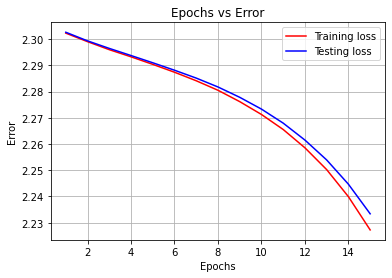

Bottleneck layer in the first epoch


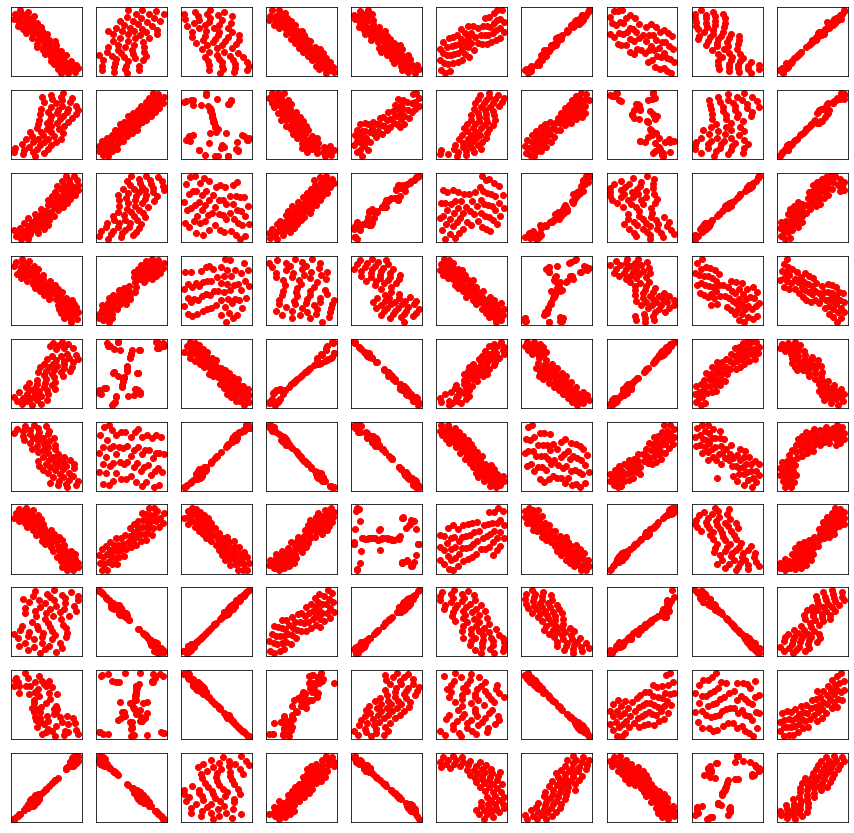

Bottleneck layer in last epoch


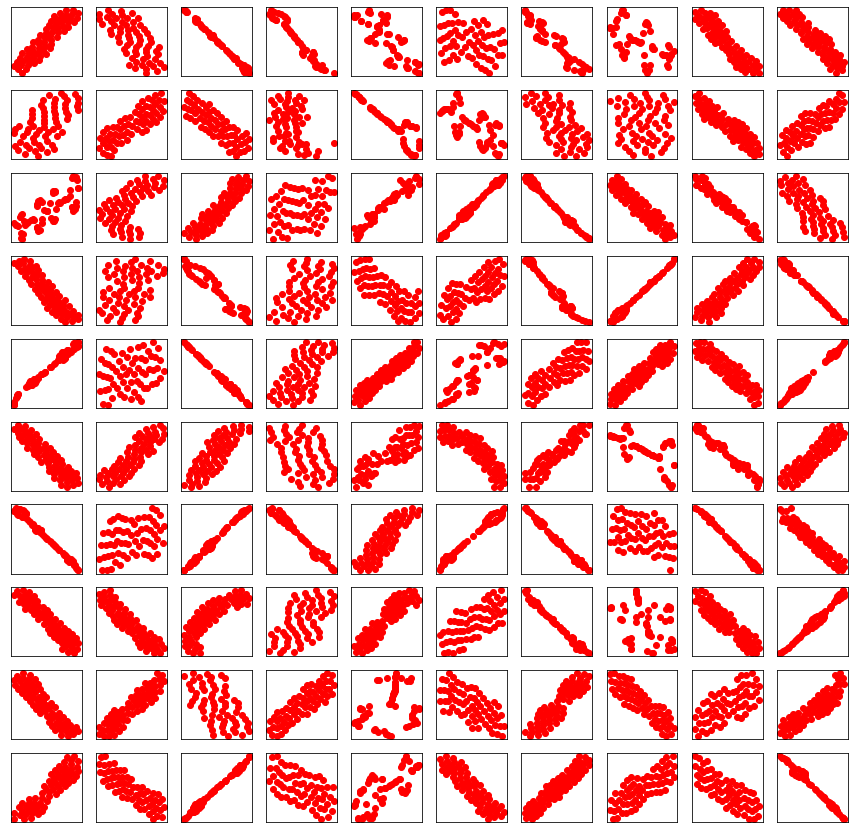

In [388]:
# initialising object of class Net
net = Net()

# setting up optimizer
optimizer = torch.optim.SGD(params = net.parameters() ,lr = 0.001 , momentum = 0.9)


train_loss = []
test_loss = []
momentum_first_epoch = []
momentum_last_epoch = []

for e in range(epochs):
    batch_size = 50
    # number of batches per epoch
    counter = 1000 // batch_size

    # shuffling training data
    np.random.shuffle(training_data)

    for c in range(counter):
        
        # compiling batch_size number of images and labels
        x = torch.tensor(np.array([training_data[i][0] for i in range(c * batch_size , (c+1) * batch_size)])).reshape(batch_size , 1 , 28 , 28)
        y = torch.tensor(np.array([training_data[i][1] for i in range(c * batch_size , (c+1) * batch_size)]))

        # computing output
        out , _ = net(x)

        # computing loss
        loss = F.cross_entropy(out , y)
        
        # setting gradients to zero, calculating gradients and updating parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    batch_size = 1000
    # computing training loss over entire training set
    train_x = torch.tensor(np.array([training_data[i][0] for i in range(len(training_data))])).reshape(len(training_data) , 1 , 28 , 28)
    train_y = torch.tensor(np.array([training_data[i][1] for i in range(len(training_data))]))
    output_train , _ = net(train_x)
    loss = F.cross_entropy(output_train , train_y)
    train_loss.append(loss.item())

    batch_size = 100
    # computing testing loss over entire testing set
    test_x = torch.tensor(np.array([testing_data[i][0] for i in range(len(testing_data))])).reshape(len(testing_data) , 1 , 28 , 28)
    test_y = torch.tensor(np.array([testing_data[i][1] for i in range(len(testing_data))]))
    output_test , bottleneck = net(test_x)
    test_loss.append(F.cross_entropy(output_test , test_y).item())
    
    # if first or last epoch, append the bottleneck layers
    if e == 0:
        momentum_first_epoch.append(bottleneck)
    if e == epochs - 1:
        momentum_last_epoch.append(bottleneck)
    
    # calculating accuracy
    if (e == epochs - 1):
        accuracy = 0
        for i in range(len(testing_data)):
            pred = np.where(output_test[i , :] == output_test[i , :].max())[0][0]
            if pred == test_y[i]:
                accuracy += 1
        accuracy /= len(testing_data)


print("The accuracy is: {}".format(accuracy))

# plotting errors vs epoch
x = [i for i in range(1,16)]
plt.plot(x , train_loss , 'r-' , label = "Training loss")
plt.plot(x , test_loss , 'b-' , label = "Testing loss")
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.legend()
plt.grid(True)
plt.title("Epochs vs Error")
plt.show()

# plotting bottleneck layers for first epoch
print("Bottleneck layer in the first epoch")
plt.figure(figsize = (15,15))
for i in range(100):
    plt.subplot(10,10,i+1)
    bn_layer = momentum_first_epoch[0][i , :].reshape(-1,1)
    bn_layer_vis = TSNE(n_components = 2).fit_transform(bn_layer)
    plt.plot(bn_layer_vis[:,0] , bn_layer_vis[:,1], 'ro')
    plt.xticks([])
    plt.yticks([])

plt.show()

# plotting bottleneck layers for last epoch
print("Bottleneck layer in last epoch")
plt.figure(figsize = (15,15))
for i in range(100):
    plt.subplot(10,10,i+1)
    bn_layer = momentum_last_epoch[0][i , :].reshape(-1,1)
    bn_layer_vis = TSNE(n_components = 2).fit_transform(bn_layer)
    plt.plot(bn_layer_vis[:,0] , bn_layer_vis[:,1], 'ro')
    plt.xticks([])
    plt.yticks([])
plt.show()
        

##### RMSProp

The accuracy is: 0.87


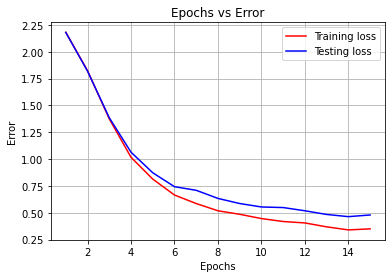

Bottleneck layer in the first epoch


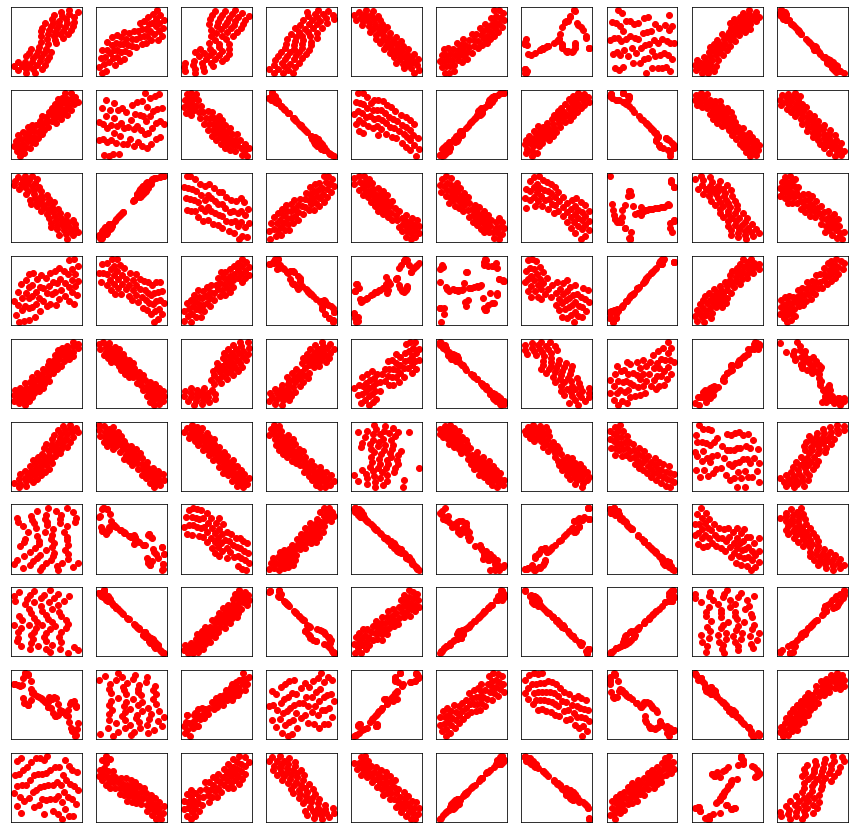

Bottleneck layer in last epoch


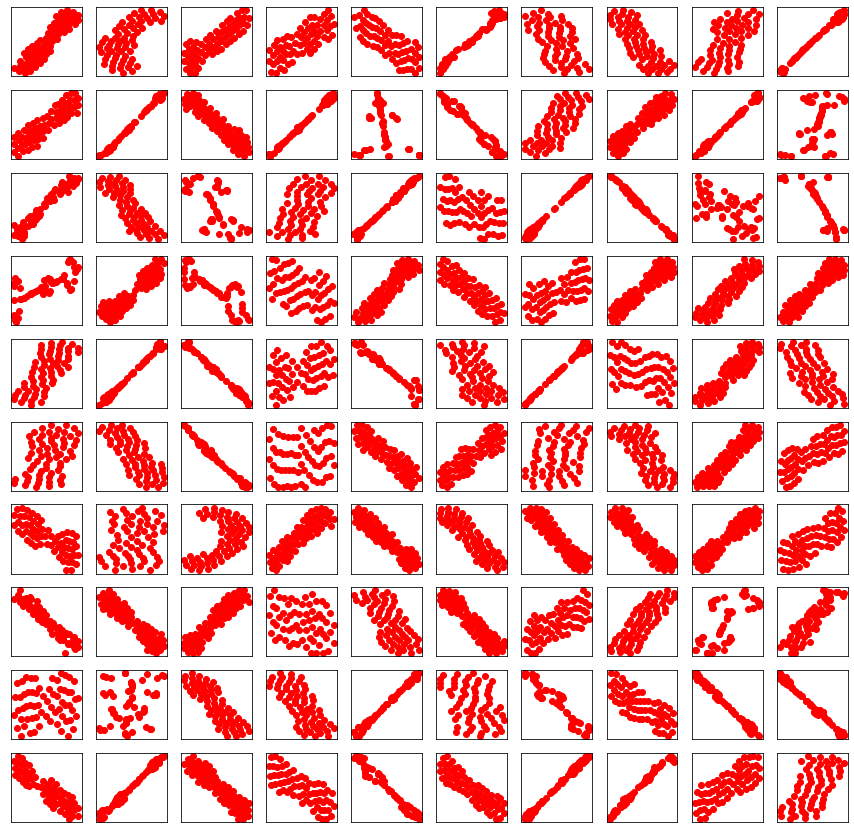

In [389]:
# initialising object of class Net
net = Net()

# setting up optimizer
optimizer = torch.optim.RMSprop(params = net.parameters() ,lr = 0.001 , alpha = 0.9)


train_loss = []
test_loss = []
rmsprop_first_epoch = []
rmsprop_last_epoch = []

for e in range(epochs):
    batch_size = 50
    # number of batches per epoch
    counter = 1000 // batch_size

    # shuffling training data
    np.random.shuffle(training_data)

    for c in range(counter):
        
        # compiling batch_size number of images and labels
        x = torch.tensor(np.array([training_data[i][0] for i in range(c * batch_size , (c+1) * batch_size)])).reshape(batch_size , 1 , 28 , 28)
        y = torch.tensor(np.array([training_data[i][1] for i in range(c * batch_size , (c+1) * batch_size)]))

        # computing output
        out , _ = net(x)

        # computing loss
        loss = F.cross_entropy(out , y)
        
        # setting gradients to zero, calculating gradients and updating parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    batch_size = 1000
    # computing training loss over entire training set
    train_x = torch.tensor(np.array([training_data[i][0] for i in range(len(training_data))])).reshape(len(training_data) , 1 , 28 , 28)
    train_y = torch.tensor(np.array([training_data[i][1] for i in range(len(training_data))]))
    output_train , _ = net(train_x)
    loss = F.cross_entropy(output_train , train_y)
    train_loss.append(loss.item())

    batch_size = 100
    # computing testing loss over entire testing set
    test_x = torch.tensor(np.array([testing_data[i][0] for i in range(len(testing_data))])).reshape(len(testing_data) , 1 , 28 , 28)
    test_y = torch.tensor(np.array([testing_data[i][1] for i in range(len(testing_data))]))
    output_test , bottleneck = net(test_x)
    test_loss.append(F.cross_entropy(output_test , test_y).item())
    
    # if first or last epoch, append the bottleneck layers
    if e == 0:
        rmsprop_first_epoch.append(bottleneck)
    if e == epochs - 1:
        rmsprop_last_epoch.append(bottleneck)

    # calculating accuracy
    if (e == epochs - 1):
        accuracy = 0
        for i in range(len(testing_data)):
            pred = np.where(output_test[i , :] == output_test[i , :].max())[0][0]
            if pred == test_y[i]:
                accuracy += 1
        accuracy /= len(testing_data)


print("The accuracy is: {}".format(accuracy))

# plotting errors vs epoch
x = [i for i in range(1,16)]
plt.plot(x , train_loss , 'r-' , label = "Training loss")
plt.plot(x , test_loss , 'b-' , label = "Testing loss")
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.legend()
plt.grid(True)
plt.title("Epochs vs Error")
plt.show()

# plotting bottleneck layers for first epoch
print("Bottleneck layer in the first epoch")
plt.figure(figsize = (15,15))
for i in range(100):
    plt.subplot(10,10,i+1)
    bn_layer = rmsprop_first_epoch[0][i , :].reshape(-1,1)
    bn_layer_vis = TSNE(n_components = 2).fit_transform(bn_layer)
    plt.plot(bn_layer_vis[:,0] , bn_layer_vis[:,1], 'ro')
    plt.xticks([])
    plt.yticks([])

plt.show()

# plotting bottleneck layers for last epoch
print("Bottleneck layer in last epoch")
plt.figure(figsize = (15,15))
for i in range(100):
    plt.subplot(10,10,i+1)
    bn_layer = rmsprop_last_epoch[0][i , :].reshape(-1,1)
    bn_layer_vis = TSNE(n_components = 2).fit_transform(bn_layer)
    plt.plot(bn_layer_vis[:,0] , bn_layer_vis[:,1], 'ro')
    plt.xticks([])
    plt.yticks([])
plt.show()
        

##### 6. Comparing results from HW4 and HW5

In the previous assignment, the accuracy rates were very low, which is because I had accidentally divided the number of correctly labelled test samples by 1000 instead of 100. Taking that into consideration, Vanilla SGD for batch size of 100 has an accuracy of 0.15, similar to the accuracy obtained using PyTorch. In the case of momentum and RMSprop, we obtained significantly higher accuracies using the APIs offered by PyTorch, than the implementations done by us from scratch.

##### 7. Applying Dropout

The accuracy is: 0.88


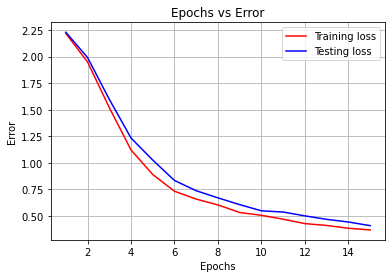

In [391]:
# DROPOUT = 0.2

# initialising object of class Net
net = Net(dropout_rate = 0.2)

# setting up optimizer
optimizer = torch.optim.RMSprop(params = net.parameters() ,lr = 0.001 , alpha = 0.9)


train_loss = []
test_loss = []

for e in range(epochs):
    batch_size = 50
    # number of batches per epoch
    counter = 1000 // batch_size

    # shuffling training data
    np.random.shuffle(training_data)

    for c in range(counter):
        
        # compiling batch_size number of images and labels
        x = torch.tensor(np.array([training_data[i][0] for i in range(c * batch_size , (c+1) * batch_size)])).reshape(batch_size , 1 , 28 , 28)
        y = torch.tensor(np.array([training_data[i][1] for i in range(c * batch_size , (c+1) * batch_size)]))

        # computing output
        out , _ = net(x , dropout = True)

        # computing loss
        loss = F.cross_entropy(out , y)
        
        # setting gradients to zero, calculating gradients and updating parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    batch_size = 1000
    # computing training loss over entire training set
    train_x = torch.tensor(np.array([training_data[i][0] for i in range(len(training_data))])).reshape(len(training_data) , 1 , 28 , 28)
    train_y = torch.tensor(np.array([training_data[i][1] for i in range(len(training_data))]))
    output_train , _ = net(train_x)
    loss = F.cross_entropy(output_train , train_y)
    train_loss.append(loss.item())

    batch_size = 100
    # computing testing loss over entire testing set
    test_x = torch.tensor(np.array([testing_data[i][0] for i in range(len(testing_data))])).reshape(len(testing_data) , 1 , 28 , 28)
    test_y = torch.tensor(np.array([testing_data[i][1] for i in range(len(testing_data))]))
    output_test , _ = net(test_x)
    test_loss.append(F.cross_entropy(output_test , test_y).item())
    
    # calculating accuracy
    if (e == epochs - 1):
        accuracy = 0
        for i in range(len(testing_data)):
            pred = np.where(output_test[i , :] == output_test[i , :].max())[0][0]
            if pred == test_y[i]:
                accuracy += 1
        accuracy /= len(testing_data)


print("The accuracy is: {}".format(accuracy))

# plotting errors vs epoch
x = [i for i in range(1,16)]
plt.plot(x , train_loss , 'r-' , label = "Training loss")
plt.plot(x , test_loss , 'b-' , label = "Testing loss")
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.legend()
plt.grid(True)
plt.title("Epochs vs Error")
plt.show()


        

The accuracy is: 0.81


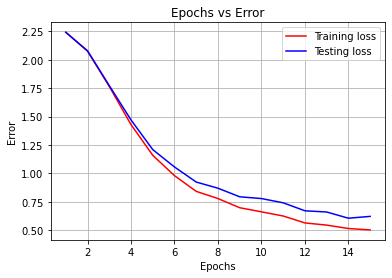

In [392]:
# DROPOUT = 0.5

# initialising object of class Net
net = Net(dropout_rate = 0.5)

# setting up optimizer
optimizer = torch.optim.RMSprop(params = net.parameters() ,lr = 0.001 , alpha = 0.9)


train_loss = []
test_loss = []

for e in range(epochs):
    batch_size = 50
    # number of batches per epoch
    counter = 1000 // batch_size

    # shuffling training data
    np.random.shuffle(training_data)

    for c in range(counter):
        
        # compiling batch_size number of images and labels
        x = torch.tensor(np.array([training_data[i][0] for i in range(c * batch_size , (c+1) * batch_size)])).reshape(batch_size , 1 , 28 , 28)
        y = torch.tensor(np.array([training_data[i][1] for i in range(c * batch_size , (c+1) * batch_size)]))

        # computing output
        out , _ = net(x , dropout = True)

        # computing loss
        loss = F.cross_entropy(out , y)
        
        # setting gradients to zero, calculating gradients and updating parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    batch_size = 1000
    # computing training loss over entire training set
    train_x = torch.tensor(np.array([training_data[i][0] for i in range(len(training_data))])).reshape(len(training_data) , 1 , 28 , 28)
    train_y = torch.tensor(np.array([training_data[i][1] for i in range(len(training_data))]))
    output_train , _ = net(train_x)
    loss = F.cross_entropy(output_train , train_y)
    train_loss.append(loss.item())

    batch_size = 100
    # computing testing loss over entire testing set
    test_x = torch.tensor(np.array([testing_data[i][0] for i in range(len(testing_data))])).reshape(len(testing_data) , 1 , 28 , 28)
    test_y = torch.tensor(np.array([testing_data[i][1] for i in range(len(testing_data))]))
    output_test , _ = net(test_x)
    test_loss.append(F.cross_entropy(output_test , test_y).item())
    
    # calculating accuracy
    if (e == epochs - 1):
        accuracy = 0
        for i in range(len(testing_data)):
            pred = np.where(output_test[i , :] == output_test[i , :].max())[0][0]
            if pred == test_y[i]:
                accuracy += 1
        accuracy /= len(testing_data)


print("The accuracy is: {}".format(accuracy))

# plotting errors vs epoch
x = [i for i in range(1,16)]
plt.plot(x , train_loss , 'r-' , label = "Training loss")
plt.plot(x , test_loss , 'b-' , label = "Testing loss")
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.legend()
plt.grid(True)
plt.title("Epochs vs Error")
plt.show()


        

The accuracy is: 0.75


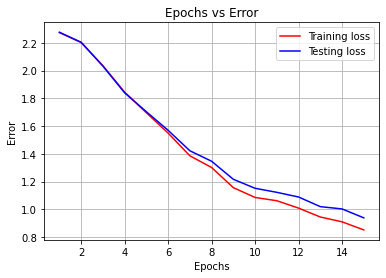

In [393]:
# DROPOUT = 0.8

# initialising object of class Net
net = Net(dropout_rate = 0.8)

# setting up optimizer
optimizer = torch.optim.RMSprop(params = net.parameters() ,lr = 0.001 , alpha = 0.9)


train_loss = []
test_loss = []

for e in range(epochs):
    batch_size = 50
    # number of batches per epoch
    counter = 1000 // batch_size

    # shuffling training data
    np.random.shuffle(training_data)

    for c in range(counter):
        
        # compiling batch_size number of images and labels
        x = torch.tensor(np.array([training_data[i][0] for i in range(c * batch_size , (c+1) * batch_size)])).reshape(batch_size , 1 , 28 , 28)
        y = torch.tensor(np.array([training_data[i][1] for i in range(c * batch_size , (c+1) * batch_size)]))

        # computing output
        out , _ = net(x , dropout = True)

        # computing loss
        loss = F.cross_entropy(out , y)
        
        # setting gradients to zero, calculating gradients and updating parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    batch_size = 1000
    # computing training loss over entire training set
    train_x = torch.tensor(np.array([training_data[i][0] for i in range(len(training_data))])).reshape(len(training_data) , 1 , 28 , 28)
    train_y = torch.tensor(np.array([training_data[i][1] for i in range(len(training_data))]))
    output_train , _ = net(train_x)
    loss = F.cross_entropy(output_train , train_y)
    train_loss.append(loss.item())

    batch_size = 100
    # computing testing loss over entire testing set
    test_x = torch.tensor(np.array([testing_data[i][0] for i in range(len(testing_data))])).reshape(len(testing_data) , 1 , 28 , 28)
    test_y = torch.tensor(np.array([testing_data[i][1] for i in range(len(testing_data))]))
    output_test , _ = net(test_x)
    test_loss.append(F.cross_entropy(output_test , test_y).item())
    
    # calculating accuracy
    if (e == epochs - 1):
        accuracy = 0
        for i in range(len(testing_data)):
            pred = np.where(output_test[i , :] == output_test[i , :].max())[0][0]
            if pred == test_y[i]:
                accuracy += 1
        accuracy /= len(testing_data)


print("The accuracy is: {}".format(accuracy))

# plotting errors vs epoch
x = [i for i in range(1,16)]
plt.plot(x , train_loss , 'r-' , label = "Training loss")
plt.plot(x , test_loss , 'b-' , label = "Testing loss")
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.legend()
plt.grid(True)
plt.title("Epochs vs Error")
plt.show()


        

##### Comparision between with and without dropout

We see the accuracy without dropout is 0.87, and accuracy with dropout is 0.88, after which it decreases. More or less the accuracy is similar with or without dropout, or higher. The performances over trainign and testing sets improve over epochs, as visible in the graph above.

##### 8. Batch Normalization

The accuracy is: 0.94


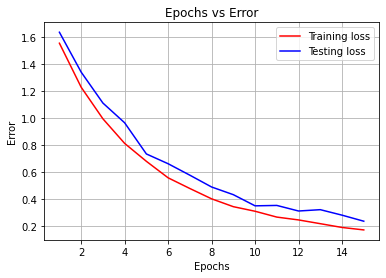

In [400]:
# DROPOUT = 0.2 and BATCH NORMALIZATION

# initialising object of class Net
net = Net(dropout_rate = 0.2)

# setting up optimizer
optimizer = torch.optim.RMSprop(params = net.parameters() ,lr = 0.001 , alpha = 0.9)


train_loss = []
test_loss = []

for e in range(epochs):
    batch_size = 50
    # number of batches per epoch
    counter = 1000 // batch_size

    # shuffling training data
    np.random.shuffle(training_data)

    for c in range(counter):
        
        # compiling batch_size number of images and labels
        x = torch.tensor(np.array([training_data[i][0] for i in range(c * batch_size , (c+1) * batch_size)])).reshape(batch_size , 1 , 28 , 28)
        y = torch.tensor(np.array([training_data[i][1] for i in range(c * batch_size , (c+1) * batch_size)]))

        # computing output
        out , _ = net(x , dropout = True , batch_norm = True)

        # computing loss
        loss = F.cross_entropy(out , y)
        
        # setting gradients to zero, calculating gradients and updating parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    batch_size = 1000
    # computing training loss over entire training set
    train_x = torch.tensor(np.array([training_data[i][0] for i in range(len(training_data))])).reshape(len(training_data) , 1 , 28 , 28)
    train_y = torch.tensor(np.array([training_data[i][1] for i in range(len(training_data))]))
    output_train , _ = net(train_x , dropout = True , batch_norm = True)
    loss = F.cross_entropy(output_train , train_y)
    train_loss.append(loss.item())

    batch_size = 100
    # computing testing loss over entire testing set
    test_x = torch.tensor(np.array([testing_data[i][0] for i in range(len(testing_data))])).reshape(len(testing_data) , 1 , 28 , 28)
    test_y = torch.tensor(np.array([testing_data[i][1] for i in range(len(testing_data))]))
    output_test , _ = net(test_x, dropout = True , batch_norm = True)
    test_loss.append(F.cross_entropy(output_test , test_y).item())
    
    # calculating accuracy
    if (e == epochs - 1):
        accuracy = 0
        for i in range(len(testing_data)):
            pred = np.where(output_test[i , :] == output_test[i , :].max())[0][0]
            if pred == test_y[i]:
                accuracy += 1
        accuracy /= len(testing_data)


print("The accuracy is: {}".format(accuracy))

# plotting errors vs epoch
x = [i for i in range(1,16)]
plt.plot(x , train_loss , 'r-' , label = "Training loss")
plt.plot(x , test_loss , 'b-' , label = "Testing loss")
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.legend()
plt.grid(True)
plt.title("Epochs vs Error")
plt.show()


        

##### Comparision of performances

Batch normalisation performes significantly better than vanilla SGD and the dropout model. The performace over training and testing sets improves over time, as seen in the graph above.